# Sentiment Classification Movie Review

The goal is to predict the sentiment (positive or negative) of a given movie review. 

Naive Bayes

SVM

Logistic Regression

Decision Tree

Neural Networks

Random Forest

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv('labeledTrainData.tsv', sep='\t',usecols=['review','sentiment'])

In [52]:
data

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...
...,...,...
24995,0,It seems like more consideration has gone into...
24996,0,I don't believe they made this film. Completel...
24997,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,0,This 30 minute documentary Buñuel made in the ...


<Axes: xlabel='sentiment', ylabel='count'>

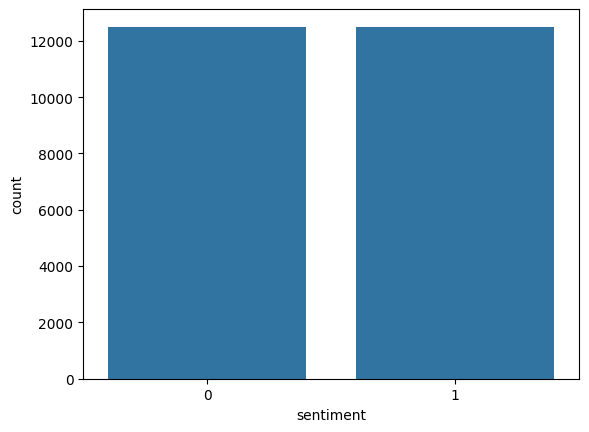

In [53]:
sns.barplot(data['sentiment'].value_counts())

### Lemmatization or Stemming

In [54]:
import nltk

# Specify the data path where NLTK should look for resources
nltk.data.path.append("/path/to/nltk_data")

# Download the "wordnet" resource
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(lemmatized_text)


In [56]:
data['cleaned_review'] = data['review'].apply(lemmatize_text)

In [57]:
import re

def remove_special_characters(text):
    # Remove special characters and punctuation
    clean_text = re.sub('[^A-Za-z\s]', '', text)
    return clean_text


In [58]:
data['cleaned_review'] = data['review'].apply(remove_special_characters)

In [59]:
def convert_to_lowercase(text):
    # Convert text to lowercase
    lowercase_text = text.lower()
    return lowercase_text


In [60]:
data['cleaned_review'] = data['review'].apply(convert_to_lowercase)

In [61]:
def remove_numeric(text):
    # Remove numeric values
    clean_text = re.sub(r'\d+', '', text)
    return clean_text


In [62]:
data['cleaned_review'] = data['review'].apply(remove_numeric)

In [63]:
import re

def remove_symbols(text):
    # Remove symbols using regular expression
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

In [64]:
data['cleaned_review'] = data['review'].apply(remove_symbols)

In [65]:
data

,sentiment,review,cleaned_review
0,1,With all this stuff going down at the moment w...,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi...",The Classic War of the Worlds by Timothy Hines...
2,0,The film starts with a manager (Nicholas Bell)...,The film starts with a manager Nicholas Bell g...
3,0,It must be assumed that those who praised this...,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,0,It seems like more consideration has gone into...,It seems like more consideration has gone into...
24996,0,I don't believe they made this film. Completel...,I dont believe they made this film Completely ...
24997,0,"Guy is a loser. Can't get girls, needs to buil...",Guy is a loser Cant get girls needs to build u...
24998,0,This 30 minute documentary Buñuel made in the ...,This 30 minute documentary Buñuel made in the ...
